# Self-Driving Car Engineer Nanodegree


## Project: **Advanced Lane Finding** 
***
In this project, your goal is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are available in the repository.

The goals / steps of this project are the following:

Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
Apply a distortion correction to raw images.
Use color transforms, gradients, etc., to create a thresholded binary image.
Apply a perspective transform to rectify binary image ("birds-eye view").
Detect lane pixels and fit to find the lane boundary.
Determine the curvature of the lane and vehicle position with respect to center.
Warp the detected lane boundaries back onto the original image.
Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.
---


## Import Packages

In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import glob
import matplotlib.image as mpmg
%matplotlib inline

## Compute the camera calibration matrix and distortion coefficients given a set of chessboard images

['./camera_cal/calibration15.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration2.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration19.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration9.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration1.jpg', './camera_cal/calibration8.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration5.jpg']
Corner Images are generated in output-images folder
Corner Images are generated in output-images folder
Corner Images are generated in output-images folder
Corner Images are generated in output-images folder
Corner Images are generated in output-images folder
Corner Images are generated in output-images folder
Corner Images ar

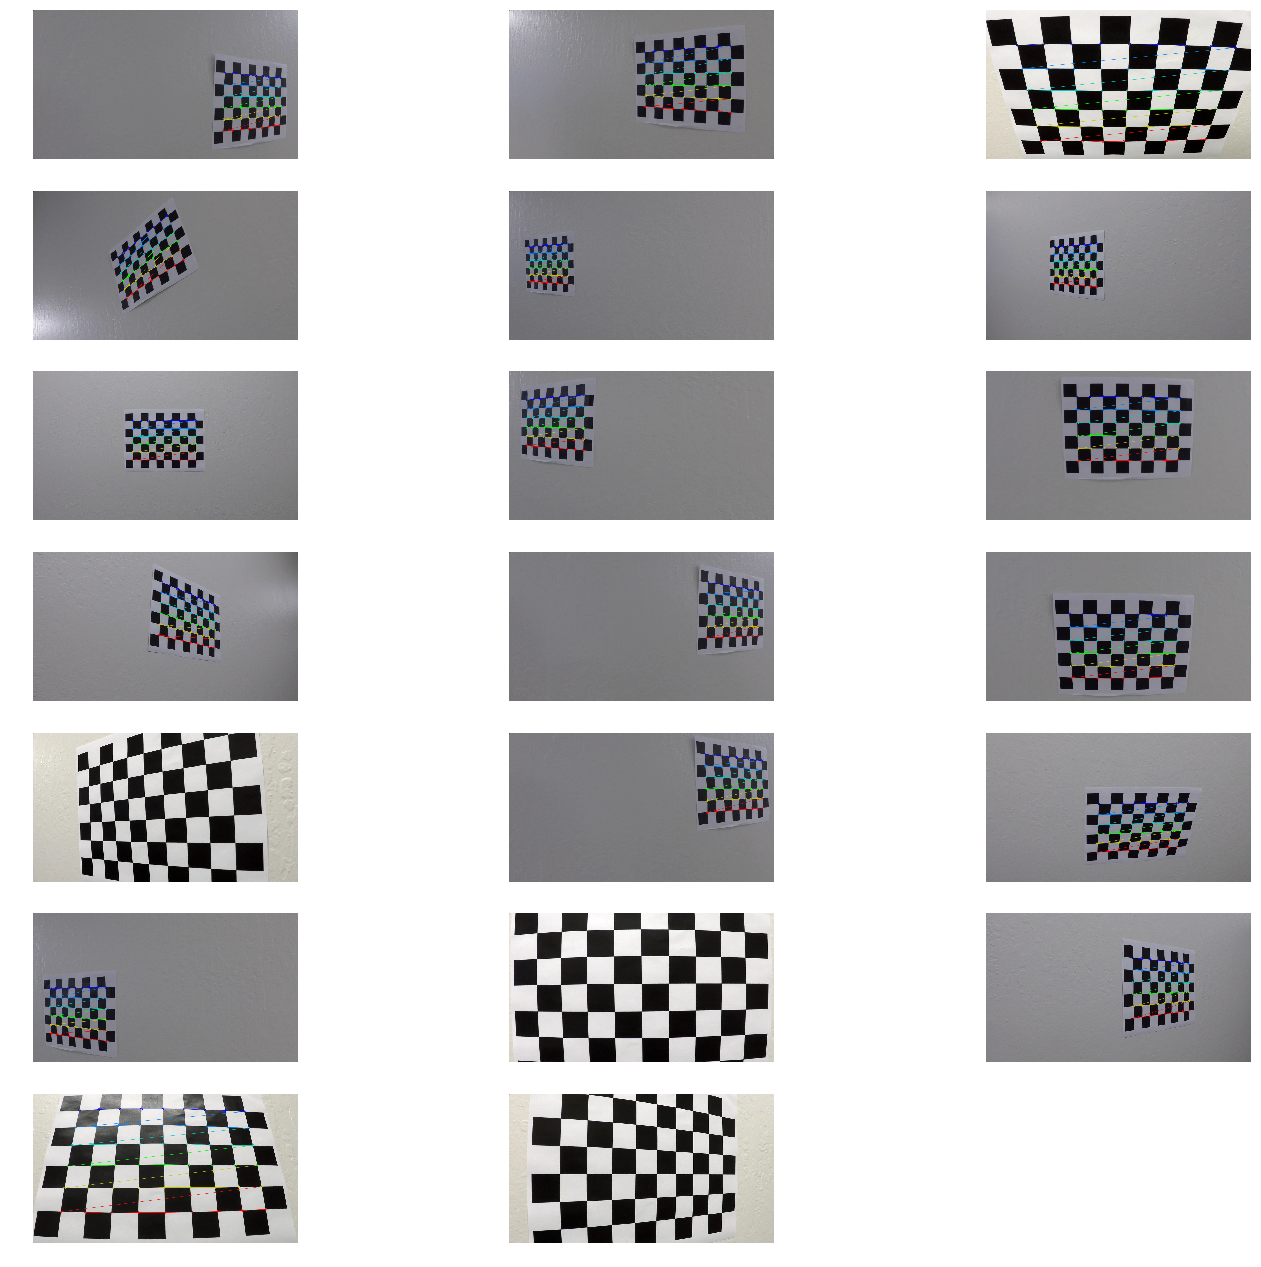

In [2]:
#number of inside corners in x
nx = 9 
#number of inside corners in y
ny = 6
images = glob.glob("./camera_cal/calibration*.jpg")
print(images)
#3d points in real world space
objectpoints =[] 
#2d points in image place
imagepoints =[] 
objp = np.zeros((nx*ny, 3),np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)
gray = []
plt.figure(figsize=(20, 25))
# for image in images[-1]:
pltindex = 0
for img in images:
    plt.subplot(10, 3, pltindex+1)
    img = mpmg.imread(img)
    plt.imshow(img)
    plt.axis("off")
    plt.tight_layout()
    grayimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(grayimg, (nx,ny), None)
    if (ret == True):
        objectpoints.append(objp)
        imagepoints.append(corners)
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret)
        plt.imshow(img)
    write_name = './output_images/cornersimg' + str(pltindex) + '.jpg'
    cv2.imwrite(write_name, img)
    print("Corner Images are generated in output-images folder")
    pltindex += 1

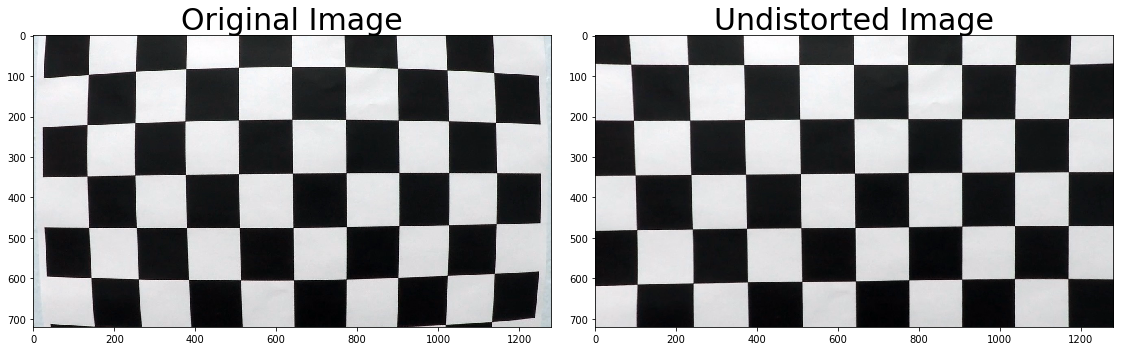

In [3]:
import pickle

img = cv2.imread("./camera_cal/calibration1.jpg")
img_size=(img.shape[1],img.shape[0])
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objectpoints, imagepoints, img_size, None, None)
undistort_image = cv2.undistort(img, mtx, dist, None, mtx)



dist_pickle ={}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump(dist_pickle,open("./camera_cal/calibration_pickle.p",'wb'))

f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 10))
f.tight_layout()
axis1.imshow(img)
write_name = './output_images/OriginalImage.jpg'
cv2.imwrite(write_name, img)
axis1.set_title('Original Image', fontsize=30)
axis2.imshow(undistort_image)
write_name = './output_images/UndistortedImage.jpg'
cv2.imwrite(write_name, undistort_image)
axis2.set_title('Undistorted Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

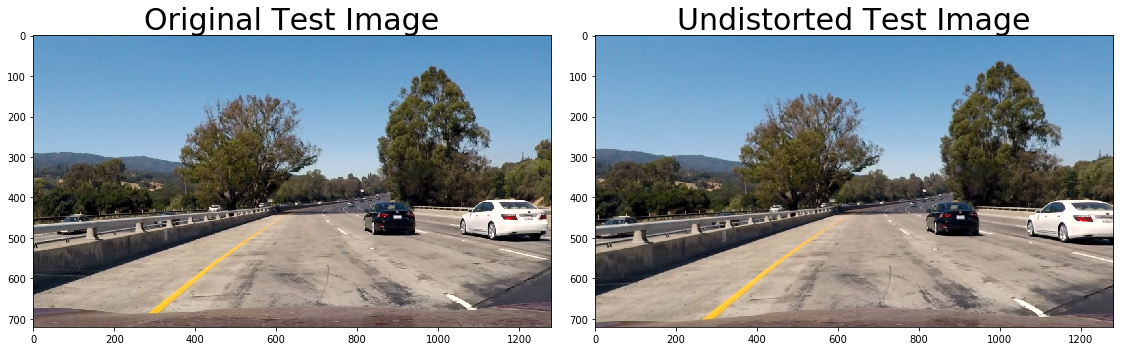

In [4]:
test_img = cv2.imread('./test_images/test1.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

test_undistort_img = cv2.undistort(test_img, mtx, dist, None, mtx)

f, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 10))
f.tight_layout()
axis1.imshow(test_img)
axis1.set_title('Original Test Image', fontsize=30)
axis2.imshow(test_undistort_img)
axis2.set_title('Undistorted Test Image', fontsize=30)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

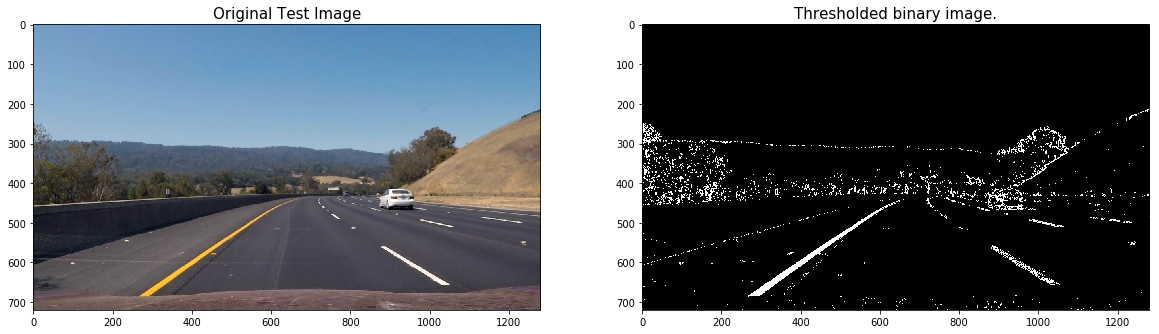

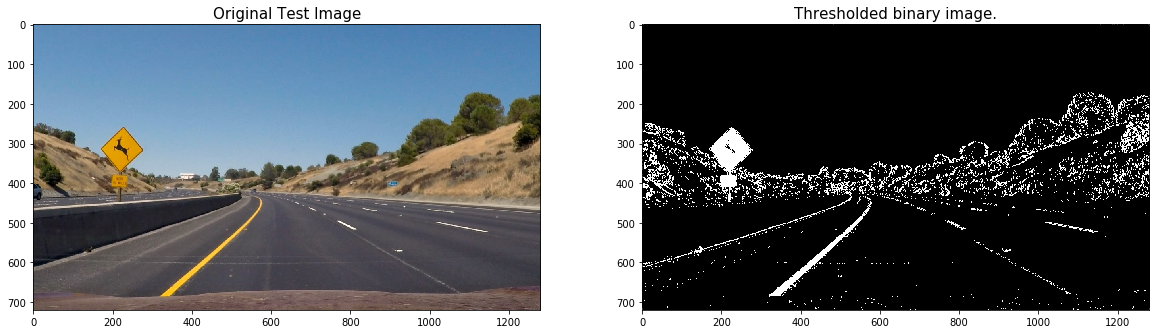

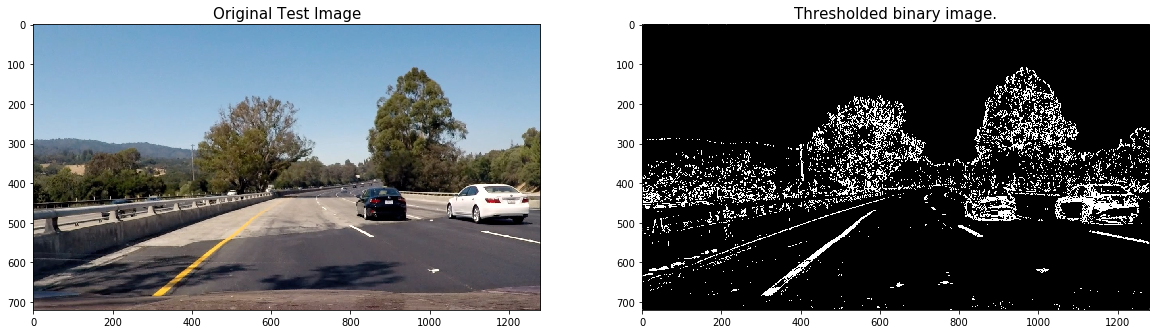

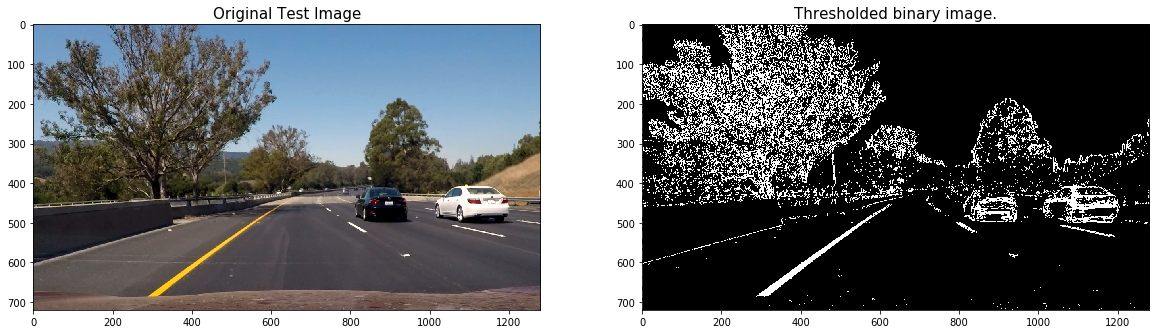

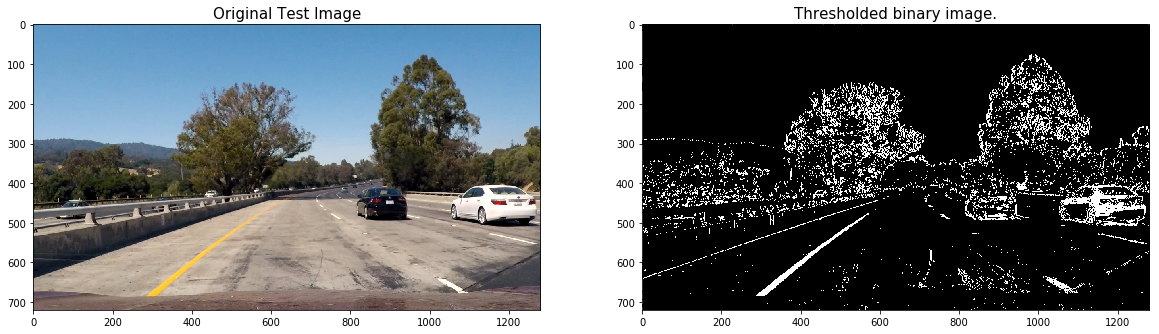

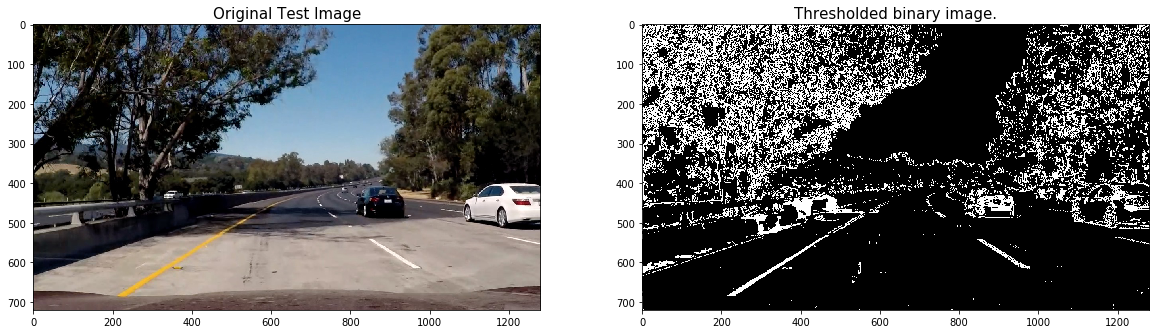

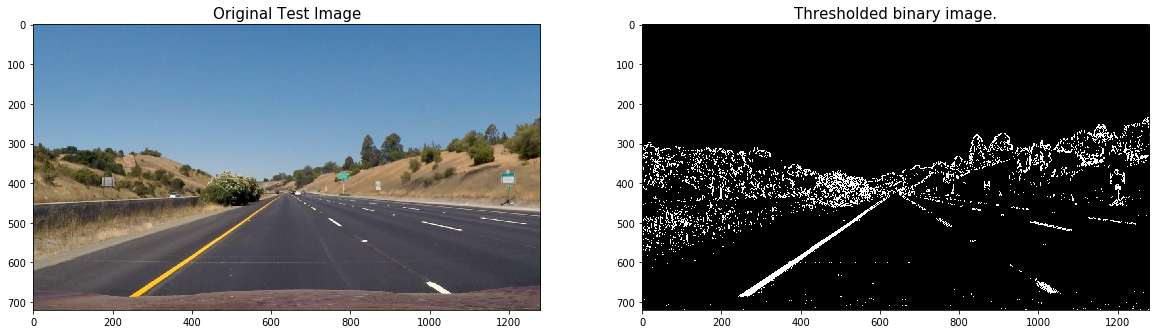

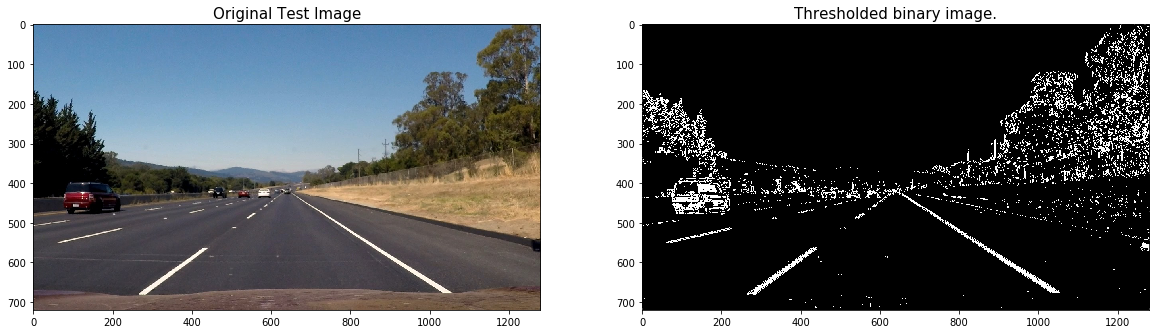

In [13]:
# create a thresholded binary image.
import os
index = 0
for file in os.listdir('./test_images/'):
    img = cv2.imread('./test_images/' + file)

    image = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    # Gray image
    gray_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Sobel x
    sobelx = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0) 

    abs_sobelx = np.absolute(sobelx)
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    thresh_min = 20
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    s_thresh_min = 170
    s_thresh_max = 260

    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1

    combined = np.zeros_like(sxbinary)
    combined[(s_binary == 1) | (sxbinary == 1)] = 1

    # plot threshold images
    f, (axis1, axis2) = plt.subplots(1, 2, figsize=(20,10))
    axis1.set_title('Original Test Image', fontsize=15)
    axis1.imshow(image)
    axis2.set_title('Thresholded binary image.', fontsize=15)
    axis2.imshow(combined, cmap='gray')
    index += 1
plt.show()

True

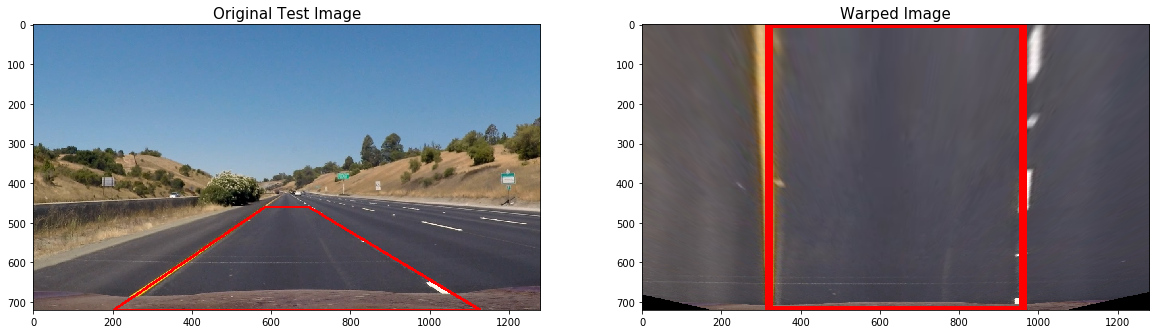

In [6]:
'''| Source        | Destination   | 
|:-------------:|:-------------:| 
| 585, 460      | 320, 0        | 
| 203, 720      | 320, 720      |
| 1127, 720     | 960, 720      |
| 695, 460      | 960, 0        |
'''

img = cv2.imread('./test_images/straight_lines1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_size = (img.shape[1], img.shape[0])

src = np.float32(
    [[(img_size[0] / 2) - 55, img_size[1] / 2 + 100],
    [((img_size[0] / 6) - 10), img_size[1]],
    [(img_size[0] * 5 / 6) + 60, img_size[1]],
    [(img_size[0] / 2 + 55), img_size[1] / 2 + 100]])
dst = np.float32(
    [[(img_size[0] / 4), 0],
    [(img_size[0] / 4), img_size[1]],
    [(img_size[0] * 3 / 4), img_size[1]],
    [(img_size[0] * 3 / 4), 0]])

M = cv2.getPerspectiveTransform(src, dst)
warped_image = cv2.warpPerspective(img, M, img_size, flags=cv2.INTER_LINEAR)

pts = np.array([[585, 460],[203, 720],[1127, 720],[695, 460]], np.int32)
pts = pts.reshape((-1,1,2))
img_copy = img.copy()
cv2.polylines(img_copy,[pts],True,(255,0,0), thickness=5)

f, (axis1, axis2) = plt.subplots(1, 2, figsize=(20,10))
axis1.set_title('Original Test Image', fontsize=15)
axis1.imshow(img_copy)
write_name = './output_images/warped_straight_lines.jpg'
warped_original_img_copy = cv2.cvtColor(img_copy, cv2.COLOR_BGR2RGB)
cv2.imwrite(write_name, warped_original_img_copy)
pts = np.array([[320,0],[320, 720],[960, 720],[960,0]], np.int32)
pts = pts.reshape((-1,1,2))

cv2.polylines(warped_image,[pts],True,(255,0,0), thickness=20)
axis2.set_title('Warped Image', fontsize=15)
axis2.imshow(warped_image)
write_name = './output_images/WarpedImage.jpg'
warped_img_copy = cv2.cvtColor(warped_image, cv2.COLOR_BGR2RGB)
cv2.imwrite(write_name, warped_img_copy)

In [7]:
# Defining various threshold functions used in the below pipelines

# Color threshold 
def color_threshold(img, sthresh=(0, 255), vthresh=(0, 255)):
    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:, :, 2]
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel > sthresh[0]) & (s_channel <= sthresh[1])] = 1

    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:, :, 2]
    v_binary = np.zeros_like(v_channel)
    v_binary[(v_channel >= vthresh[0]) & (v_channel <= vthresh[1])] = 1

    output = np.zeros_like(s_channel)
    output[(s_binary == 1) & (v_binary == 1)] = 1
    return output


def abs_sobel_thresh(img, orient='x', thresh_min=0, thresh_max=255):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if orient == 'x':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 1, 0))
    if orient == 'y':
        abs_sobel = np.absolute(cv2.Sobel(gray, cv2.CV_64F, 0, 1))
    # Rescale back to 8 bit integer
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    # Create a copy and apply the threshold
    binary_output = np.zeros_like(scaled_sobel)
    # Here I'm using inclusive (>=, <=) thresholds, but exclusive is ok too
    binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Return the result
    return binary_output

# Define a function that applies Sobel x and y, then computes the magnitude of the gradient and applies a threshold
def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    # Take both Sobel x and y gradients
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
    # Calculate the gradient magnitude
    gradmag = np.sqrt(sobelx ** 2 + sobely ** 2)
    # Rescale to 8 bit
    scale_factor = np.max(gradmag) / 255
    gradmag = (gradmag / scale_factor).astype(np.uint8)
    # Create a binary image of ones where threshold is met, zeros otherwise
    binary_output = np.zeros_like(gradmag)
    binary_output[(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return binary_output

def window_mask(width, height, img_ref, center, level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0] - (level + 1) * height):int(img_ref.shape[0] - level * height),
    max(0, int(center - width)):min(int(center + width),img_ref.shape[1])] = 1
    return output


In [8]:
# Detecting lane pixels and fit to find the lane boundary 
from tracker import tracker
dist_pickle = pickle.load(open("./camera_cal/calibration_pickle.p", 'rb'))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

images = glob.glob("./test_images/test*.jpg")
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img = cv2.undistort(img, mtx, dist, None, mtx)

    preprocessImage = np.zeros_like(img[:, :, 0])

    gradx = abs_sobel_thresh(img, orient='x', thresh_min=12, thresh_max=255)
    grady = abs_sobel_thresh(img, orient='y', thresh_min=25, thresh_max=255)
    c_binary = color_threshold(img, sthresh=(100, 255), vthresh=(50, 255))

    preprocessImage[(gradx == 1) & (grady == 1) | (c_binary == 1)] = 255

    # work on the perspective transformation area

    img_size = (img.shape[1],img.shape[0])
    bot_width = 0.76 #perent of bottom trapizoid height
    mid_width = 0.08 #percent of middle trapizoid height
    height_pct = 0.62 #percent for trapizoid height
    bottom_trim = 0.935 #percent from top to bottom to avoid car hood

    src = np.float32([[img.shape[1] * (0.5 - mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + bot_width / 2), img.shape[0] * bottom_trim],
                      [img.shape[1] * (0.5 - bot_width / 2), img.shape[0] * bottom_trim]])
    offset = img_size[0] * 0.25
    dst = np.float32(
        [[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

    #perform the transform
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(preprocessImage,M,img_size,flags=cv2.INTER_LINEAR)

    window_width = 25
    window_height = 80

    curve_centers = tracker(Mywindow_width = window_width,Mywindow_height= window_height, Mymargin = 25,My_ym = 10/720,My_xm = 4/384,Mysmooth_factor = 15)

    window_centroids = curve_centers.find_window_centroids(warped)

    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    rightx = []
    leftx = []

    for level in range(0,len(window_centroids)):
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)
        leftx.append(window_centroids[level][0])
        rightx.append(window_centroids[level][1])
        l_points[(l_points == 255) | ((l_mask == 1) )] = 255
        r_points[(r_points == 255) | ((r_mask == 1))] = 255

    # Draw the results

    template = np.array(r_points+l_points,np.uint8)
    zero_channel = np.zeros_like(template)
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8)
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8)
    result = cv2.addWeighted(warpage,1,template,0.5,0.0)

    write_name = './output_images/tracked' + str(idx) + '.jpg'
    cv2.imwrite(write_name, result)
    print("Images are generated in output-images folder")


Images are generated in output-images folder
Images are generated in output-images folder
Images are generated in output-images folder
Images are generated in output-images folder
Images are generated in output-images folder
Images are generated in output-images folder


In [11]:
# In this pipeline determining the curvature of the lane and vehicle position with respect to center
from tracker import tracker
dist_pickle = pickle.load(open("./camera_cal/calibration_pickle.p", 'rb'))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

images = glob.glob("./test_images/test*.jpg")
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    img = cv2.undistort(img, mtx, dist, None, mtx)

    preprocessImage = np.zeros_like(img[:, :, 0])

    gradx = abs_sobel_thresh(img, orient='x', thresh_min=12, thresh_max=255)
    grady = abs_sobel_thresh(img, orient='y', thresh_min=25, thresh_max=255)
    c_binary = color_threshold(img, sthresh=(100, 255), vthresh=(50, 255))

    preprocessImage[(gradx == 1) & (grady == 1) | (c_binary == 1)] = 255

    # work on the perspective transformation area
    img_size = (img.shape[1],img.shape[0])
    bot_width = 0.76 #perent of bottom trapizoid height
    mid_width = 0.08 #percent of middle trapizoid height
    height_pct = 0.62 #percent for trapizoid height
    bottom_trim = 0.935 #percent from top to bottom to avoid car hood

    src = np.float32([[img.shape[1] * (0.5 - mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + bot_width / 2), img.shape[0] * bottom_trim],
                      [img.shape[1] * (0.5 - bot_width / 2), img.shape[0] * bottom_trim]])
    offset = img_size[0] * 0.25
    dst = np.float32(
        [[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

    #perform the transform
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(preprocessImage,M,img_size,flags=cv2.INTER_LINEAR)

    window_width = 25
    window_height = 80

    curve_centers = tracker(Mywindow_width = window_width,Mywindow_height= window_height, Mymargin = 25,My_ym = 10/720,My_xm = 4/384,Mysmooth_factor = 15)

    window_centroids = curve_centers.find_window_centroids(warped)

    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    rightx = []
    leftx = []

    for level in range(0,len(window_centroids)):
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)
        leftx.append(window_centroids[level][0])
        rightx.append(window_centroids[level][1])
        l_points[(l_points == 255) | ((l_mask == 1) )] = 255
        r_points[(r_points == 255) | ((r_mask == 1))] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8)
    zero_channel = np.zeros_like(template)
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8)
    warpage = np.array(cv2.merge((warped,warped,warped)),np.uint8)
    #result = cv2.addWeighted(warpage,1,template,0.5,0.0)


    #fit the lane boundaries to the left , right center positions found
    yvals = range(0,img.shape[0])
    # print(warped.shape[0])
    res_yvals = np.arange(img.shape[0] - (window_height / 2), 0, -window_height)

    left_fit = np.polyfit(res_yvals, leftx, 2)
    left_fitx = left_fit[0] * yvals * yvals + left_fit[1] * yvals + left_fit[2]
    left_fitx = np.array(left_fitx, np.int32)

    # right_fit = np.polyfit(res_yvals, rightx, 2)
    right_fit = np.polyfit(res_yvals, rightx, 2)
    # right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
    right_fitx = right_fit[0] * yvals * yvals + right_fit[1] * yvals + right_fit[2]
    righ_fitx = np.array(right_fitx, np.int32)

    left_lane = np.array(list(
        zip(np.concatenate((left_fitx - window_width / 2, left_fitx[::-1] + window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
    right_lane = np.array(list(
        zip(np.concatenate((right_fitx - window_width / 2, right_fitx[::-1] + window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
    middel_marker = np.array(list(
        zip(np.concatenate((left_fitx + window_width / 2, right_fitx[::-1] - window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)

    road = np.zeros_like(img)
    road_bkg = np.zeros_like(img)

    cv2.fillPoly(road, [left_lane], color=[255, 0, 0])
    cv2.fillPoly(road, [right_lane], color=[0, 0, 255])
    cv2.fillPoly(road_bkg, [left_lane], color=[255, 255, 255])
    cv2.fillPoly(road_bkg, [right_lane], color=[255, 255, 255])
    road_warped = cv2.warpPerspective(road, Minv, img_size, flags=cv2.INTER_LINEAR)
    road_warped_bkg = cv2.warpPerspective(road_bkg, Minv, img_size, flags=cv2.INTER_LINEAR)
    base = cv2.addWeighted(img, 1.0, road_warped_bkg, -1.0, 0.0)
    result = cv2.addWeighted(base, 1.0, road_warped, 1.0, 0.0)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension

    curve_fit_cr = np.polyfit(np.array(res_yvals, np.float32) * ym_per_pix, np.array(leftx, np.float32) * xm_per_pix, 2)
    curverad = ((1 + (2 * curve_fit_cr[0] * yvals[-1] * ym_per_pix + curve_fit_cr[1]) ** 2) ** 1.5) / np.absolute(
        2 * curve_fit_cr[0])

    # calculate the offset of the car on the road
    camera_center = (left_fitx[-1] + right_fitx[-1]) / 2
    center_diff = (camera_center - warped.shape[1] / 2) * xm_per_pix
    side_pos = 'left'
    if center_diff <= 0:
        side_pos = 'right'

    # draw the text showing curvature, offset, and speed
    cv2.putText(result, 'Radius of Curvature = ' + str(round(curverad, 3)) + '(m)', (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                1, (255, 255, 255), 2)
    cv2.putText(result, 'Vehicle is ' + str(abs(round(center_diff, 3))) + 'm ' + side_pos + ' of center', (50, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    write_name = './output_images/tracked_curvature' + str(idx) + '.jpg'
    cv2.imwrite(write_name, result)
    print("Curvature Images are generated in output_images folder")


Curvature Images are generated in output_images folder
Curvature Images are generated in output_images folder
Curvature Images are generated in output_images folder
Curvature Images are generated in output_images folder
Curvature Images are generated in output_images folder
Curvature Images are generated in output_images folder


In [12]:
from moviepy.editor import VideoFileClip
from IPython.display import HTML
from tracker import tracker

dist_pickle = pickle.load(open("./camera_cal/calibration_pickle.p", "rb"))
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]

def process_image(img):

    img = cv2.undistort(img, mtx, dist, None, mtx)

    preprocessImage = np.zeros_like(img[:, :, 0])

    gradx = abs_sobel_thresh(img, orient='x', thresh_min=12, thresh_max=255)
    grady = abs_sobel_thresh(img, orient='y', thresh_min=25, thresh_max=255)
    c_binary = color_threshold(img, sthresh=(100, 255), vthresh=(50, 255))

    preprocessImage[(gradx == 1) & (grady == 1) | (c_binary == 1)] = 255

    # work on the perspective transformation area

    img_size = (img.shape[1],img.shape[0])
    bot_width = 0.76 #perent of bottom trapizoid height
    mid_width = 0.08 #percent of middle trapizoid height
    height_pct = 0.62 #percent for trapizoid height
    bottom_trim = 0.935 #percent from top to bottom to avoid car hood

    src = np.float32([[img.shape[1] * (0.5 - mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + mid_width / 2), img.shape[0] * height_pct],
                      [img.shape[1] * (0.5 + bot_width / 2), img.shape[0] * bottom_trim],
                      [img.shape[1] * (0.5 - bot_width / 2), img.shape[0] * bottom_trim]])
    offset = img_size[0] * 0.25
    dst = np.float32(
        [[offset, 0], [img_size[0] - offset, 0], [img_size[0] - offset, img_size[1]], [offset, img_size[1]]])

    #perform the transform
    M = cv2.getPerspectiveTransform(src,dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    warped = cv2.warpPerspective(preprocessImage,M,img_size,flags=cv2.INTER_LINEAR)

    window_width = 25
    window_height = 88

    curve_centers = tracker(Mywindow_width = window_width,Mywindow_height= window_height, Mymargin = 25,My_ym = 10/720,My_xm = 4/384,Mysmooth_factor = 15)

    window_centroids = curve_centers.find_window_centroids(warped)

    l_points = np.zeros_like(warped)
    r_points = np.zeros_like(warped)

    rightx = []
    leftx = []

    for level in range(0,len(window_centroids)):
        l_mask = window_mask(window_width,window_height,warped,window_centroids[level][0],level)
        r_mask = window_mask(window_width, window_height, warped, window_centroids[level][1], level)
        leftx.append(window_centroids[level][0])
        rightx.append(window_centroids[level][1])
        l_points[(l_points == 255) | ((l_mask == 1) )] = 255
        r_points[(r_points == 255) | ((r_mask == 1))] = 255

    #fit the lane boundaries to the left , right center positions found
    yvals = range(0,img.shape[0])
    # print(warped.shape[0])
    res_yvals = np.arange(img.shape[0] - (window_height / 2), 0, -window_height)

    left_fit = np.polyfit(res_yvals, leftx, 2)
    left_fitx = left_fit[0] * yvals * yvals + left_fit[1] * yvals + left_fit[2]
    left_fitx = np.array(left_fitx, np.int32)

    # right_fit = np.polyfit(res_yvals, rightx, 2)
    right_fit = np.polyfit(res_yvals, rightx, 2)
    # right_fitx = right_fit[0]*yvals*yvals + right_fit[1]*yvals + right_fit[2]
    right_fitx = right_fit[0] * yvals * yvals + right_fit[1] * yvals + right_fit[2]
    right_fitx = np.array(right_fitx, np.int32)

    left_lane = np.array(list(
        zip(np.concatenate((left_fitx - window_width / 2, left_fitx[::-1] + window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)
    right_lane = np.array(list(
        zip(np.concatenate((right_fitx - window_width / 2, right_fitx[::-1] + window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)

    inner_lane = np.array(list(
        zip(np.concatenate((left_fitx + window_width / 2, right_fitx[::-1] - window_width / 2), axis=0),
            np.concatenate((yvals, yvals[::-1]), axis=0))), np.int32)

    road = np.zeros_like(img)
    road_bkg = np.zeros_like(img)

    cv2.fillPoly(road, [left_lane], color=[255, 0, 0])
    cv2.fillPoly(road, [right_lane], color=[0, 0, 255])
    cv2.fillPoly(road, [inner_lane], color=[0, 255, 0])
    cv2.fillPoly(road_bkg, [left_lane], color=[255, 255, 255])
    cv2.fillPoly(road_bkg, [right_lane], color=[255, 255, 255])
    road_warped = cv2.warpPerspective(road, Minv, img_size, flags=cv2.INTER_LINEAR)
    road_warped_bkg = cv2.warpPerspective(road_bkg, Minv, img_size, flags=cv2.INTER_LINEAR)

    base = cv2.addWeighted(img, 1.0, road_warped_bkg, -1.0, 0.0)
    result = cv2.addWeighted(base, 1.0, road_warped, 0.7, 0.0)

    ym_per_pix = 30/720 # meters per pixel in y dimension
    xm_per_pix = 3.7/700 # meters per pixel in x dimension


    curve_fit_cr = np.polyfit(np.array(res_yvals, np.float32) * ym_per_pix, np.array(leftx, np.float32) * xm_per_pix, 2)
    curverad = ((1 + (2 * curve_fit_cr[0] * yvals[-1] * ym_per_pix + curve_fit_cr[1]) ** 2) ** 1.5) / np.absolute(
        2 * curve_fit_cr[0])

    # calculate the offset of the car on the road
    camera_center = (left_fitx[-1] + right_fitx[-1]) / 2
    center_diff = (camera_center - warped.shape[1] / 2) * xm_per_pix
    side_pos = 'left'
    if center_diff <= 0:
        side_pos = 'right'

    # draw the text showing curvature, offset, and speed
    cv2.putText(result, 'Radius of Curvature = ' + str(round(curverad, 3)) + '(m)', (50, 50), cv2.FONT_HERSHEY_SIMPLEX,
                1, (255, 255, 255), 2)
    cv2.putText(result, 'Vehicle is ' + str(abs(round(center_diff, 3))) + 'm ' + side_pos + ' of center', (50, 100),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    return result

output_video = 'Project_output_video.mp4'
Input_video = 'project_video.mp4'

clip1 = VideoFileClip(Input_video)
video_clip = clip1.fl_image(process_image)
video_clip.write_videofile(output_video,audio=False)

[MoviePy] >>>> Building video Project_output_video.mp4
[MoviePy] Writing video Project_output_video.mp4


100%|█████████▉| 1260/1261 [03:27<00:00,  5.56it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: Project_output_video.mp4 

